## Loading and Reevaluating Previous Model

This is just a sanity check that I'd like to make because th repository has been a mess in the recent while. So in order to check that this model has the same weights as the one reported in my last report, I am going to load it and then reevaluate it on the test set, and see if I get the same AUC score.

In [6]:
from keras.models import load_model
from keras.models import model_from_json
import json

# open json file and read content
with open('analysis_best_model/best_model.json','r') as f:
    json_string = f.readline()
# deserialize the json data into a keras model (only structure)
model = model_from_json(json_string)
# load the adjusted weights of the model
model.load_weights('analysis_best_model/best_model.h5')
# print a summary of the structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
__________

### Read Dataset

In [7]:
import csv

smiles, y_test = [], []
with open('data/test.csv') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        if row[1] != 'smiles':
            # read smiles from the 2nd column
            smiles.append(row[1])
            # read labels from the 3rd column
            y_test.append(row[2])

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

info_dicts, X_test = [], []
for smile in smiles:
    m = Chem.MolFromSmiles(smile)
    info = {}
    bit_vector = AllChem.GetMorganFingerprintAsBitVect(m, 3, nBits=2048, bitInfo=info)
    X_test.append(bit_vector)
    info_dicts.append(info)
    
X_test = np.array(X_test)
y_test = np.array(y_test, dtype=np.int8)

### Evaluation

In [9]:
def plot_roc(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

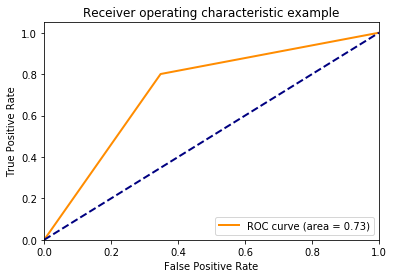

In [10]:
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_pred = model.predict_classes(X_test)
auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
plot_roc(fpr, tpr, auc)

## Integrated Gradients

In the following we provide an implementation for the integrated gradients. Steps of the implementation are:

In [3]:
from keras import backend as k


baseline = np.zeros()
gradients = k.gradients([1, 2], [0, 0])

In [31]:
prediction_tensor = model.predict(X_test) # prediciton tensor
input_tensor = X_test # input tensor
gradients = tf.gradients(prediction_tensor, input_tensor)
# compute the gradient of the input picture wrt this loss
# grads = K.gradients(loss, input_img)[0]

In [32]:
gradients

[None]